#IMPORT LIBRARIES

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

#LOAD DATA

In [23]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Data Labelling

In [25]:
df_new = df.copy()
le = LabelEncoder()

In [26]:
df_new['sex'] = le.fit_transform(df_new['sex'])
df_new['smoker'] = le.fit_transform(df_new['smoker'])
df_new['region']=le.fit_transform(df_new['region'])

print(f"Transformed data : \n{df_new}")

Transformed data : 
      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


#Model build

In [28]:
model = IsolationForest(n_estimators = 100, contamination = 0.05, random_state = 42)
model.fit(df_new)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",100
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [30]:
df['anomaly_score'] = model.predict(df_new)

In [31]:
print("\nAnomaly Counts:")
print(df['anomaly_score'].value_counts())


Anomaly Counts:
anomaly_score
 1    1271
-1      67
Name: count, dtype: int64


In [34]:
anomalies = df[df['anomaly_score'] == -1]
anomalies.head()

,age,sex,bmi,children,smoker,region,charges,anomaly_score
39,60,male,39.90,0,yes,southwest,48173.3610,-1
86,57,female,31.16,0,yes,northwest,43578.9394,-1
92,59,male,29.83,3,yes,northeast,30184.9367,-1
94,64,female,31.30,2,yes,southwest,47291.0550,-1
98,56,male,19.95,0,yes,northeast,22412.6485,-1


#Visualization

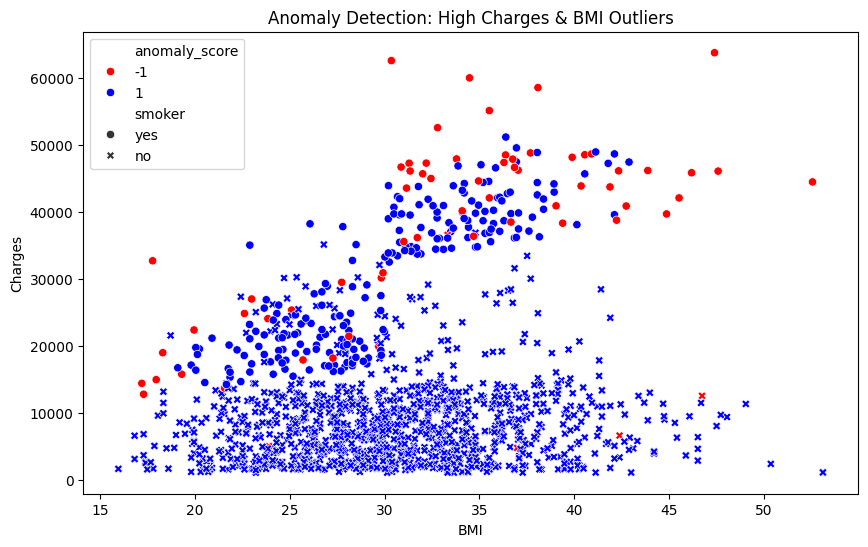

In [37]:
import seaborn as sns

# 1. Visualization
plt.figure(figsize=(10, 6))

# Scatter plot: Normal data in Blue, Anomalies in Red
sns.scatterplot(
    data=df, 
    x='bmi', 
    y='charges', 
    hue='anomaly_score', 
    palette={1: 'blue', -1: 'red'}, # 1 is Normal, -1 is Anomaly
    style='smoker' # Different shapes for smokers vs non-smokers
)

plt.title('Anomaly Detection: High Charges & BMI Outliers')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

##TEST CASE

In [36]:
# 2. Real-Time Test
# Define a new "weird" record
new_data = pd.DataFrame({
    'age': [19],
    'sex': [1],        # male
    'bmi': [22.5],     # normal
    'children': [0],
    'smoker': [0],     # non-smoker (should be cheap!)
    'region': [1],     # southwest
    'charges': [100000.0] # SUPER HIGH CHARGE
})

# Predict!
# Note: We must explicitly state the columns to match training order
prediction = model.predict(new_data)

print(f"Prediction for New Record: {prediction[0]}")
# Expectation: -1 (Anomaly)

Prediction for New Record: -1
